# importing

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

root = "E:/ricePhenoExt/colorchecker"
colorchecker_path  = os.path.join(root,"cc1_L.jpg")


img = cv2.imdecode(np.fromfile(colorchecker_path, dtype=np.uint8), -1)

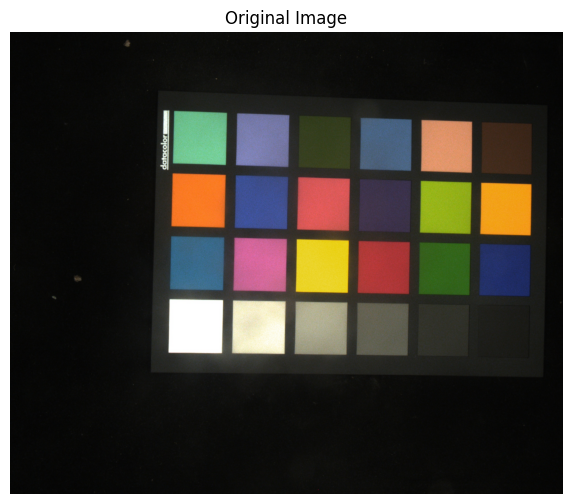

In [2]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # ËΩ¨Êç¢‰∏∫RGB
plt.axis('off') 
plt.title('Original Image')
plt.show()

# detection

In [ ]:
detector = cv2.mcc.CCheckerDetector_create()
detector.process(img, cv2.mcc.MCC24)  # Ê£ÄÊµãÂõæÂÉè
checker = detector.getBestColorChecker()  # ÊèêÂèñËâ≤Âç°ÂØπË±°

72

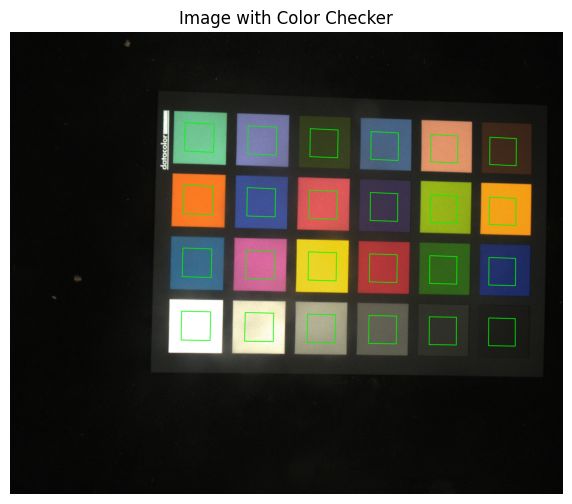

In [9]:
# ÁªòÂõæ
cdraw = cv2.mcc.CCheckerDraw_create(checker)
img_draw = img.copy()
cdraw.draw(img_draw)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Image with Color Checker')
plt.show()


# compare color

In [14]:
chartsRGB = checker.getChartsRGB()
src = chartsRGB[:, 1].copy().reshape(24, 1, 3)
src /= 255.0


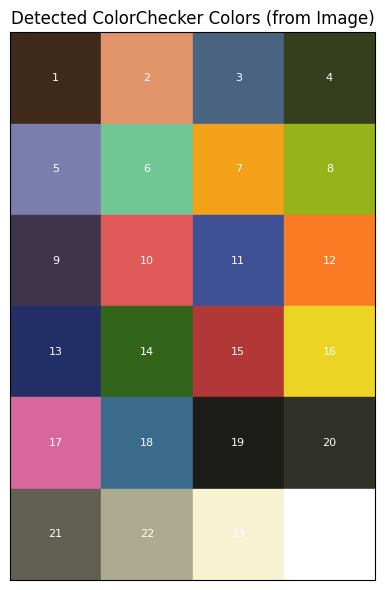

In [15]:
# src ÊòØ shape (24, 1, 3)ÔºåÂèñÂá∫Âπ∂ squeeze
colors = src.squeeze()  # shape: (24, 3), ÊØèË°åÊòØ RGBÔºåÂÄºËåÉÂõ¥Âú® 0~1

# ÁªòÂà∂ 6 Ë°å 4 ÂàóÁöÑÈ¢úËâ≤Âùó
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    rect = plt.Rectangle((col, 5 - row), 1, 1, color=colors[i])
    ax.add_patch(rect)
    ax.text(col + 0.5, 5 - row + 0.5, str(i+1), ha='center', va='center', fontsize=8, color='white')

# ËÆæÁΩÆÂõæÂÉèËåÉÂõ¥ÂíåÊ†∑Âºè
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Detected ColorChecker Colors (from Image)")
plt.tight_layout()
plt.show()


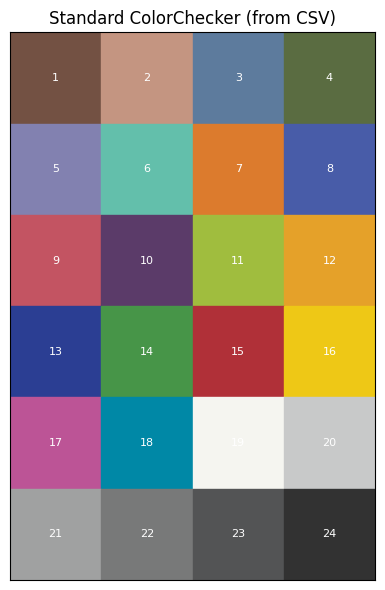

In [18]:
import pandas as pd

# ËØªÂèñÊ†áÂáÜËâ≤Âç° CSVÔºàRGB ÂÄºËåÉÂõ¥Â∫îÊòØ 0~255Ôºâ
file_path = r'E:\ricePhenoExt\python-macduff-colorchecker-detector\color_data\BabelColor_Avg_2006.csv'
std_df = pd.read_csv(file_path, header=None, names=['R', 'G', 'B'], na_values=[' ', 'NaN'])

# ËΩ¨Êç¢‰∏∫ÂΩí‰∏ÄÂåñ RGB Êï∞ÁªÑÔºàÂÄºËåÉÂõ¥‰∏∫ 0~1Ôºâ
standard_colors = std_df[['R', 'G', 'B']].values / 255.0  # shape (24, 3)
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    color = standard_colors[i]
    rect = plt.Rectangle((col, 5 - row), 1, 1, color=color)
    ax.add_patch(rect)
    ax.text(col + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')

# ÂõæÂΩ¢ÁæéÂåñ
ax.set_xlim(0, 4)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Standard ColorChecker (from CSV)")
plt.tight_layout()
plt.show()

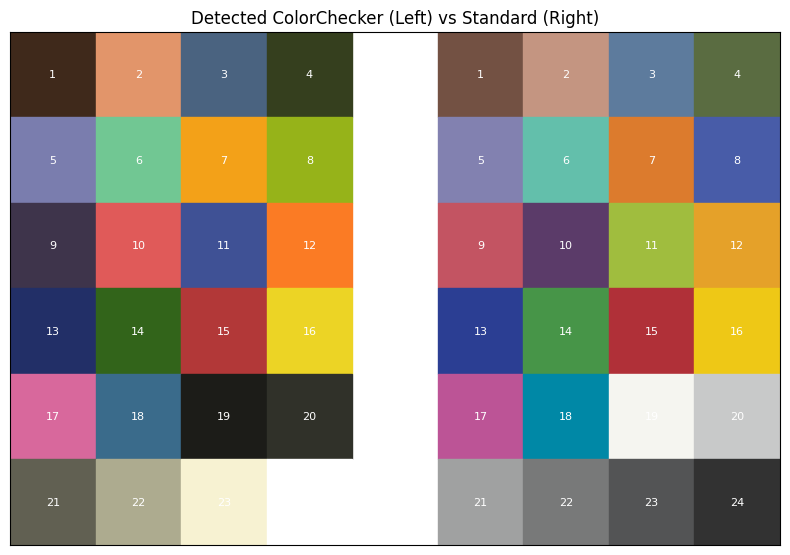

In [19]:
# Ê£ÄÊµãËâ≤Âç°ÔºàÂõæÂÉè‰∏≠ÊèêÂèñÁöÑÈ¢úËâ≤Ôºâ
detected_colors = src.squeeze()  # shape (24, 3)

# Á°Æ‰øù‰Ω†Â∑≤ÁªèËØªÂèñÊ†áÂáÜËâ≤Âç°CSVÂπ∂ËΩ¨Êç¢‰∏∫ÂΩí‰∏ÄÂåñRGBÔºö
# standard_colors = pd.read_csv(...)[['R', 'G', 'B']].values / 255.0

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    
    # Â∑¶ÂàóÔºöÊ£ÄÊµãÈ¢úËâ≤ÔºàÊù•Ëá™ÂõæÂÉèÔºâ
    rect1 = plt.Rectangle((col, 5 - row), 1, 1, color=detected_colors[i])
    ax.add_patch(rect1)
    
    # Âè≥ÂàóÔºöÊ†áÂáÜÈ¢úËâ≤ÔºàÊù•Ëá™CSVÔºâ
    rect2 = plt.Rectangle((col + 5, 5 - row), 1, 1, color=standard_colors[i])
    ax.add_patch(rect2)
    
    # Ê†áÊ≥®ÁºñÂè∑
    ax.text(col + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')
    ax.text(col + 5 + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')

# ÂõæÂΩ¢ÁæéÂåñ
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Detected ColorChecker (Left) vs Standard (Right)")
plt.tight_layout()
plt.show()


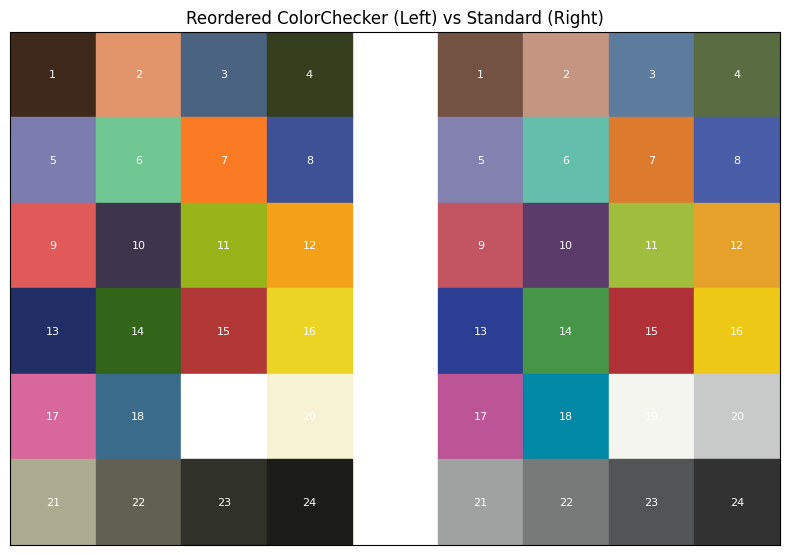

In [21]:
# ÂéüÂßãÊ£ÄÊµãÂà∞ÁöÑÈ¢úËâ≤Êï∞ÁªÑÔºàshape: 24, 3Ôºâ
detected_colors = src.squeeze()  # shape (24, 3)

# ÊâãÂä®ÈáçÊéíÔºö7~12 ÂÄíÂ∫èÔºå19~24 ÂÄíÂ∫è
reordered = np.concatenate([
    detected_colors[0:6],        # 1~6 Ê≠£Â∏∏
    detected_colors[6:12][::-1], # 7~12 ÂÄíÂ∫è
    detected_colors[12:18],      # 13~18 Ê≠£Â∏∏
    detected_colors[18:24][::-1] # 19~24 ÂÄíÂ∫è
], axis=0)

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(24):
    row = i // 4
    col = i % 4
    
    # Â∑¶ÂàóÔºöÊ£ÄÊµãÈ¢úËâ≤ÔºàÊù•Ëá™ÂõæÂÉèÔºâ
    rect1 = plt.Rectangle((col, 5 - row), 1, 1, color=reordered[i])
    ax.add_patch(rect1)
    
    # Âè≥ÂàóÔºöÊ†áÂáÜÈ¢úËâ≤ÔºàÊù•Ëá™CSVÔºâ
    rect2 = plt.Rectangle((col + 5, 5 - row), 1, 1, color=standard_colors[i])
    ax.add_patch(rect2)
    
    # Ê†áÊ≥®ÁºñÂè∑
    ax.text(col + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')
    ax.text(col + 5 + 0.5, 5 - row + 0.5, str(i + 1), ha='center', va='center', fontsize=8, color='white')

# ÂõæÂΩ¢ÁæéÂåñ
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("Reordered ColorChecker (Left) vs Standard (Right)")
plt.tight_layout()
plt.show()

# calculate

In [22]:
# ÂéüÂßãÁöÑ srcÔºàshape: 24, 1, 3Ôºâ
src_raw = chartsRGB[:, 1].copy().reshape(24, 3) / 255.0  # ÂÖà reshape ‰∏∫ (24, 3)

# ‰øÆÊ≠£È°∫Â∫è
src_corrected = np.concatenate([
    src_raw[0:6],
    src_raw[6:12][::-1],
    src_raw[12:18],
    src_raw[18:24][::-1]
], axis=0)

# ÂÜç reshape Âõû (24, 1, 3)Ôºå‰ª•‰æõ ColorCorrectionModel ‰ΩøÁî®
src = src_corrected.reshape(24, 1, 3)

In [25]:
model1 = cv2.ccm_ColorCorrectionModel(src, cv2.mcc.MCC24)
model1.run()
ccm = model1.getCCM()
print("ccm ", ccm)
loss = model1.getLoss()
print("loss ", loss)

ccm  [[ 0.98948805 -0.10281211 -0.07385449]
 [ 0.10050432  1.20347975  0.18892033]
 [-0.01947019  0.06403464  1.39816129]]
loss  8.902390509997083


## ‚úÖ ‰∏Ä„ÄÅCCM Âê´‰πâÁÆÄ‰ªã

CCM ÊòØ‰∏Ä‰∏™ `3√ó3` ÁöÑÈ¢úËâ≤ÂèòÊç¢Áü©ÈòµÔºåÁî®‰∫éÂ∞ÜÂõæÂÉè‰∏≠ÁöÑ RGB È¢úËâ≤Êò†Â∞ÑÂà∞ÁõÆÊ†áÔºàÂ¶Ç Macbeth Ëâ≤Âç°ÔºâÈ¢úËâ≤Á©∫Èó¥Ôºö

\[
\begin{bmatrix}
R_{cal} \\
G_{cal} \\
B_{cal}
\end{bmatrix}
=
\text{CCM} \cdot
\begin{bmatrix}
R \\
G \\
B
\end{bmatrix}
\]

ÊØèË°åË°®Á§∫ **ËæìÂá∫ÈÄöÈÅì**ÔºàR', G', B'ÔºâÁî±ÂéüÂßãÈÄöÈÅìÂä†ÊùÉÁªÑÊàê„ÄÇ

---

## ‚úÖ ‰∫å„ÄÅÂØπËøô‰∏™Áü©ÈòµÁöÑÂÖ∑‰ΩìÂàÜÊûê

```text
[[ 0.989  -0.103  -0.074 ]   ‚ü∂ ‰øÆÊ≠£ R ÂàÜÈáèÔºöÈôç‰Ωé G Âíå B ÂØπ R ÁöÑÂΩ±Âìç
 [ 0.100   1.203   0.189 ]   ‚ü∂ ‰øÆÊ≠£ G ÂàÜÈáèÔºöÊèêÂçá G ÊùÉÈáçÔºåÂä†ÂÖ•Â∞ëÈáè R Âíå B
 [-0.019   0.064   1.398 ]]  ‚ü∂ ‰øÆÊ≠£ B ÂàÜÈáèÔºöÂ§ßÂπÖÂ¢ûÂº∫ B ÈÄöÈÅìÂìçÂ∫î
```

### üéØ ‰ª£Ë°®Âê´‰πâÔºö
- R ÈÄöÈÅìÁõ∏ÂØπÁ®≥ÂÆöÔºàÊé•ËøëÂçï‰ΩçÁü©ÈòµÔºâÔºåÁï•ÂæÆË∞ÉÊï¥‰∫Ü G Âíå B ÂàÜÈáèÁöÑÂπ≤Êâ∞Ôºõ
- G ÈÄöÈÅìÊòéÊòæÊèêÂçáÔºà1.2√óÔºâÔºåÊÑèÂë≥ÁùÄÂéüÂõæ G ÂÅèÊöó/‰∏çÂ§üÈ•±ÂíåÔºõ
- B ÈÄöÈÅìÁöÑ 1.398 Ë°®Á§∫ËìùËâ≤ÂÅèÂº±ÔºåÊ†°Ê≠£Êó∂Ë¶ÅÂ§ßÂπÖÂ¢ûÂº∫Ôºõ
- Ë¥üÂÄº‰ª£Ë°®ÂéªÈô§ÈÄöÈÅìÂπ≤Êâ∞ÔºåÊØîÂ¶Ç `-0.102` ËØ¥Êòé G ÂàÜÈáèÂØπ R ÊúâË¥üÂπ≤Êâ∞„ÄÇ

---

## ‚úÖ ‰∏â„ÄÅLoss ÂÄºËß£ËØª

```text
loss = 8.90
```

Ëøô‰∏™ÂÄºÈÄöÂ∏∏Ë°®Á§∫Ê®°ÂûãÊ†°Ê≠£ÂâçÂêé‰∏éÁõÆÊ†áËâ≤‰πãÈó¥ÁöÑËØØÂ∑ÆÔºàMSE Êàñ ŒîE Âπ≥ÊñπÂíåÔºâÔºåÂèØÁêÜËß£‰∏∫Ôºö

- **< 3**ÔºöÊûÅ‰Ω≥ÔºàÂõæÂÉèË¥®Èáè‰∏ì‰∏ö‰øÆÊ≠£Ôºâ
- **3~6**Ôºö‰∏çÈîôÔºàÊôÆÈÄöÂ∑•‰∏ö/ÁßëÁ†îÂèØÊé•ÂèóÔºâ
- **6~10**ÔºöËâ≤Â∑ÆÂèØËßÅÔºà‰∫∫ÁúºÊïèÊÑüÂú∫ÊôØÂèØËÉΩÂØüËßâÔºâ
- **> 10**ÔºöÊ†°Ê≠£ÊïàÊûú‰∏ÄËà¨ÊàñÂéüÂõæÂÅèÂ∑ÆËøáÂ§ß

### üéØ ÊâÄ‰ª•Ëøô‰∏™ÂÄºÔºö
- `8.9` Â±û‰∫é**‰∏≠Á≠âÂÅèÈ´ò**ÁöÑËØØÂ∑ÆÔºåËØ¥ÊòéÂõæÂÉèÂ≠òÂú®‰∏ÄÂÆöÂÅèËâ≤Ôºå‰ΩÜÊ†°Ê≠£ÂêéÂ∑≤Áªè**Âü∫Êú¨Êî∂Êïõ**Ôºõ
- Â¶ÇÊûú‰Ω†ÂØπËâ≤ÂΩ©Ë¶ÅÊ±ÇÂæàÈ´òÔºàÂ¶ÇÁßëÁ†îÁ∫ßÊàêÂÉèÔºâÔºåÂèØ‰ª•ËÄÉËôë‰ºòÂåñÔºö
  - Ëâ≤Âç°Ê£ÄÊµãÂå∫ÂüüÂáÜÁ°ÆÂ∫¶ÔºàÈÅÆÊå°/ÂÖâÁÖßÂùáÂåÄÊÄßÔºâ
  - Áõ∏Êú∫ÁôΩÂπ≥Ë°°„ÄÅÊõùÂÖâËÆæÁΩÆ
  - ÂõæÂÉèÂéãÁº©ÂâçÊòØÂê¶Â∑≤Â§ÑÁêÜËøáÈ¢úËâ≤


## ‚úÖ ÊÄªÁªì

| È°π | Ëß£ËØª |
|----|------|
| `CCM` | Ê†°Ê≠£‰∫Ü G„ÄÅB ÊòéÊòæÂÅèÊöóÁöÑÈóÆÈ¢ò |
| `Loss = 8.90` | Êúâ‰∏ÄÂÆöËØØÂ∑ÆÔºå‰ΩÜÊ†°Ê≠£ÊïàÊûúÂ∑≤ÊîπÂñÑÊòéÊòæÔºåÂõæÂÉèÂÅèËâ≤ËæÉÊòéÊòæ |


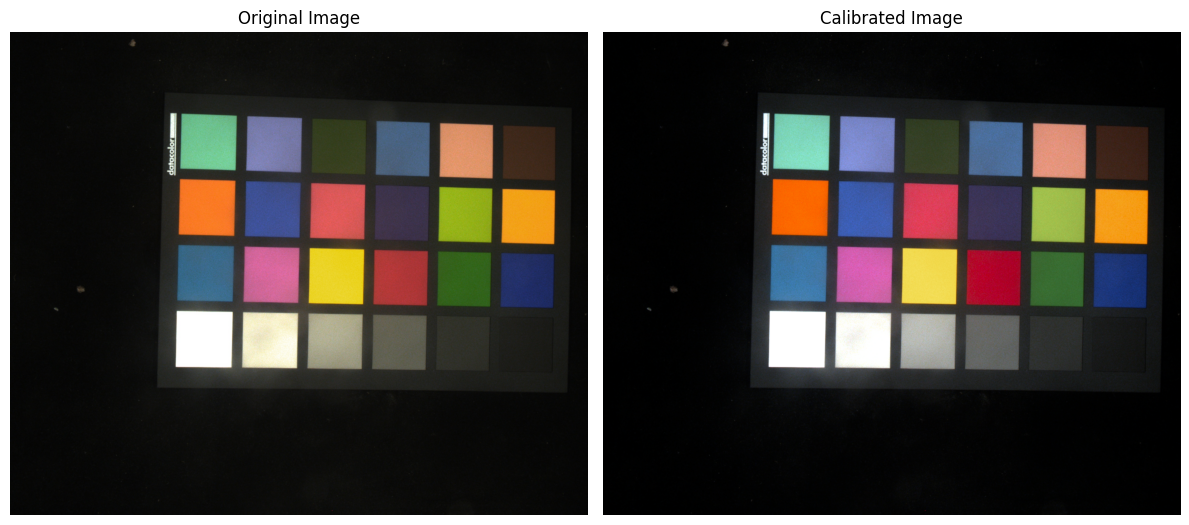

In [27]:
# ÂéüÂõæÔºàBGR ËΩ¨ RGB ÂΩí‰∏ÄÂåñÔºâ
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64) / 255

# ÂõæÂÉèÊ†°Ê≠£Êé®ÁêÜ
calibratedImage = model1.infer(img_rgb)

# ÊÅ¢Â§çÂÉèÁ¥†ËåÉÂõ¥
out_ = calibratedImage * 255
out_[out_ < 0] = 0
out_[out_ > 255] = 255
out_ = out_.astype(np.uint8)

# ÊòæÁ§∫ÂØπÊØîÔºàÂ∑¶Âè≥Âπ∂ÊéíÔºâ
plt.figure(figsize=(12, 6))

# ÂéüÂõæ
plt.subplot(1, 2, 1)
plt.imshow((img_rgb * 255).astype(np.uint8))
plt.axis('off')
plt.title('Original Image')

# Ê†°Ê≠£Âõæ
plt.subplot(1, 2, 2)
plt.imshow(out_)
plt.axis('off')
plt.title('Calibrated Image')

plt.tight_layout()
plt.show()

# practical utilize

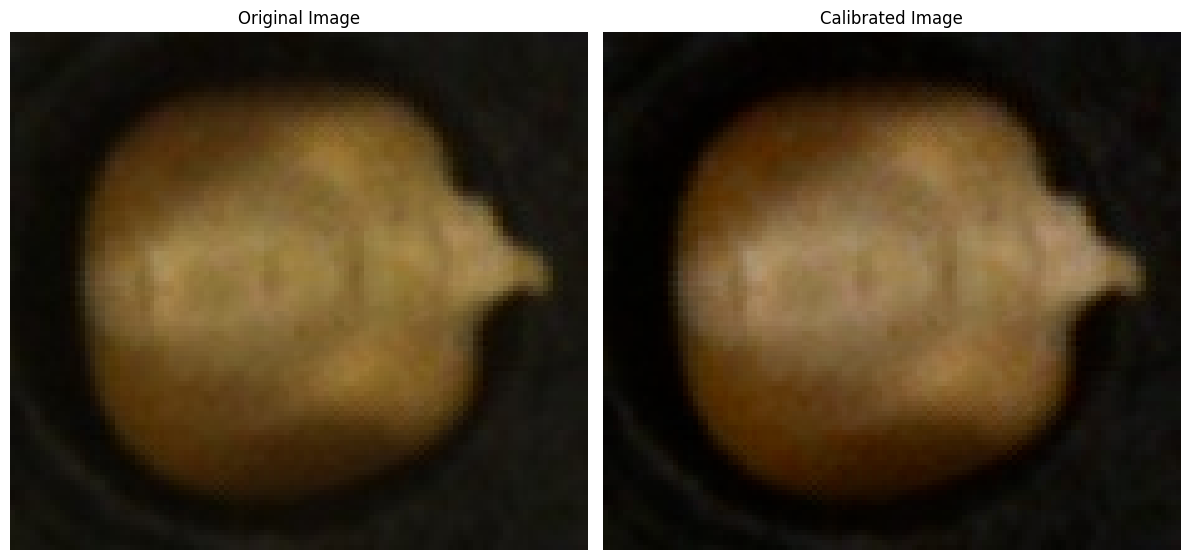

In [28]:
# ËÆæÁΩÆË∑ØÂæÑ
folder = r"E:/maize/ÂèåÈù¢ÁéâÁ±≥ÁÖßÁâá1/ÂèåÈù¢ÁéâÁ±≥ÁÖßÁâá/isolation"
image_list = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# ËØªÂèñÁ¨¨‰∏ÄÂº†ÂõæÁâá
first_image_path = os.path.join(folder, image_list[0])
img = cv2.imdecode(np.fromfile(first_image_path, dtype=np.uint8), -1)

# BGR ‚Üí RGB & ÂΩí‰∏ÄÂåñ
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64) / 255

# Êé®ÁêÜÈ¢úËâ≤Ê†°Ê≠£
calibrated = model1.infer(img_rgb)
calibrated = np.clip(calibrated * 255, 0, 255).astype(np.uint8)

# ÊòæÁ§∫ÂØπÊØîÂõæ
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow((img_rgb * 255).astype(np.uint8))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(calibrated)
plt.axis('off')
plt.title('Calibrated Image')

plt.tight_layout()
plt.show()


In [29]:
# ËÆæÁΩÆ‰øùÂ≠òË∑ØÂæÑ
output_folder = r"E:/maize/ÂèåÈù¢ÁéâÁ±≥ÁÖßÁâá1/ÂèåÈù¢ÁéâÁ±≥ÁÖßÁâá/isolation_corrected"
os.makedirs(output_folder, exist_ok=True)

# ÈÅçÂéÜÂõæÂÉèÂπ∂ÊâπÈáèÂ§ÑÁêÜ
for img_name in image_list:
    img_path = os.path.join(folder, img_name)
    img = cv2.imdecode(np.fromfile(img_path, dtype=np.uint8), -1)

    if img is None:
        print(f"Ë∑≥ËøáÊó†Ê≥ïËØªÂèñÁöÑÂõæÂÉèÔºö{img_name}")
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float64) / 255
    calibrated = model1.infer(img_rgb)
    calibrated = np.clip(calibrated * 255, 0, 255).astype(np.uint8)
    calibrated_bgr = cv2.cvtColor(calibrated, cv2.COLOR_RGB2BGR)

    # ‰øùÂ≠òÊ†°Ê≠£ÂêéÁöÑÂõæÂÉè
    save_path = os.path.join(output_folder, img_name)
    ext = os.path.splitext(img_name)[1]
    cv2.imencode(ext, calibrated_bgr)[1].tofile(save_path)

print("‚úÖ ÊâπÈáèÊ†°Ê≠£ÂÆåÊàêÔºå‰øùÂ≠ò‰∫éÔºö", output_folder)


‚úÖ ÊâπÈáèÊ†°Ê≠£ÂÆåÊàêÔºå‰øùÂ≠ò‰∫éÔºö E:/maize/ÂèåÈù¢ÁéâÁ±≥ÁÖßÁâá1/ÂèåÈù¢ÁéâÁ±≥ÁÖßÁâá/isolation_corrected
